## 1. Linear Regression

In [193]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
%matplotlib inline

path='D:/Projects/Capstone/'
filename=path+'intervention.csv'
data=pd.read_csv(filename,encoding='ISO-8859-1',na_filter=True)

In [194]:
data.head()

,Unnamed: 0,ville,year,month,day,hour,Total incidents,Temp,Dew_point,Humidity,...,division,latitude,longitude,nombre_unites,area(km2),density,income-avg(2015),income-median(2015),population,#int
0,0,Ahuntsic / Cartierville,2008,1,1,0,11,-4.7,-6.3,89.0,...,21.0,45.556506,-73.685032,2.0,24.16,5556.498344,70105.0,51169.0,122475.1932,2
1,1,Ahuntsic / Cartierville,2008,1,1,1,3,-4.2,-6.3,85.0,...,21.0,45.581554,-73.651107,1.0,24.16,5556.498344,70105.0,51169.0,122475.1932,0
2,2,Ahuntsic / Cartierville,2008,1,1,2,4,-2.8,-6.2,77.0,...,21.0,45.524449,-73.737146,1.0,24.16,5556.498344,70105.0,51169.0,122475.1932,1
3,3,Ahuntsic / Cartierville,2008,1,1,3,12,-2.1,-5.7,76.0,...,21.0,45.548322,-73.677277,3.0,24.16,5556.498344,70105.0,51169.0,122475.1932,2
4,4,Ahuntsic / Cartierville,2008,1,1,4,11,-2.2,-5.5,78.0,...,21.0,45.570641,-73.656907,1.0,24.16,5556.498344,70105.0,51169.0,122475.1932,1


In [195]:
ville=data['ville']
ville=ville.tolist()
ville=set(ville)
ville=list(ville)
ville

["L'Ã\x8ele-Bizard-Sainte-GeneviÃ¨ve",
 'Villeray-Saint-Michel-Parc-Extension',
 'Sud-Ouest',
 'Westmount',
 'Kirkland',
 'Pierrefonds / Roxboro',
 'Ville-Marie',
 'Lasalle',
 'Lachine',
 'Anjou',
 'RiviÃ¨re-des-Prairies / P-A-T/Mtl-Est',
 'CÃ´te St-Luc / Hampstead / Mtl-Ouest',
 'Rosemont-La Petite-Patrie',
 'Pointe-Claire',
 'Dorval / Ile Dorval',
 'Plateau Mont-Royal',
 'MontrÃ©al-Nord',
 'Outremont',
 'Verdun',
 'CÃ´te-des-Neiges / Notre-Dame-de-GrÃ¢ce',
 'Mont-Royal',
 'Dollard-des-Ormeaux / Roxboro',
 'Pierrefonds / Senneville',
 'Ile-Bizard / Ste-GeneviÃ¨ve / Ste-A-de-B',
 'RiviÃ¨re-des-Prairies / Pointe-aux-Trembles',
 'Saint-Laurent',
 'Ahuntsic / Cartierville',
 "Beaconsfield / Baie d'UrfÃ©",
 'Saint-LÃ©onard',
 'Mercier-Hochelaga-Maisonneuve']

In [196]:
dict_ville={}
for i in range(30):
    dict_ville[ville[i]]=i
dict_ville

{'Ahuntsic / Cartierville': 26,
 'Anjou': 9,
 "Beaconsfield / Baie d'UrfÃ©": 27,
 'CÃ´te St-Luc / Hampstead / Mtl-Ouest': 11,
 'CÃ´te-des-Neiges / Notre-Dame-de-GrÃ¢ce': 19,
 'Dollard-des-Ormeaux / Roxboro': 21,
 'Dorval / Ile Dorval': 14,
 'Ile-Bizard / Ste-GeneviÃ¨ve / Ste-A-de-B': 23,
 'Kirkland': 4,
 "L'Ã\x8ele-Bizard-Sainte-GeneviÃ¨ve": 0,
 'Lachine': 8,
 'Lasalle': 7,
 'Mercier-Hochelaga-Maisonneuve': 29,
 'Mont-Royal': 20,
 'MontrÃ©al-Nord': 16,
 'Outremont': 17,
 'Pierrefonds / Roxboro': 5,
 'Pierrefonds / Senneville': 22,
 'Plateau Mont-Royal': 15,
 'Pointe-Claire': 13,
 'RiviÃ¨re-des-Prairies / P-A-T/Mtl-Est': 10,
 'RiviÃ¨re-des-Prairies / Pointe-aux-Trembles': 24,
 'Rosemont-La Petite-Patrie': 12,
 'Saint-Laurent': 25,
 'Saint-LÃ©onard': 28,
 'Sud-Ouest': 2,
 'Verdun': 18,
 'Ville-Marie': 6,
 'Villeray-Saint-Michel-Parc-Extension': 1,
 'Westmount': 3}

### Hard-code ville and hour

In [197]:
data.shape

(2663940, 22)

In [198]:
len(data)

2663940

In [199]:
ville_=data['ville'].values
index=dict_ville[ville_[0]]
index

26

In [200]:
district_code=np.zeros((30,len(data)))
ville_=data['ville'].values
for i in range(len(ville_)):
    index=dict_ville[ville_[i]]
    district_code[index][i]=1

In [201]:
hour_code=np.zeros((24,len(data)))
hour_=data['hour'].values
for i in range(len(hour_)):
    index=hour_[i]
    hour_code[index][i]=1

In [202]:
data.columns

Index(['Unnamed: 0', 'ville', 'year', 'month', 'day', 'hour',
       'Total incidents', 'Temp', 'Dew_point', 'Humidity', 'weekday',
       'caserne', 'division', 'latitude', 'longitude', 'nombre_unites',
       'area(km2)', 'density', 'income-avg(2015)', 'income-median(2015)',
       'population', '#int'],
      dtype='object')

In [203]:
data=data[['Temp', 'Dew_point', 'Humidity', 'weekday','nombre_unites','area(km2)', 'density', 'income-avg(2015)', 'income-median(2015)',
       'population', '#int']]

In [204]:
data.shape

(2663940, 11)

In [205]:
name=['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v28','v29','v30']
for i in range(30):
    data[name[i]]=district_code[i]


In [206]:
name=['h0','h1','h2','h3','h4','h5','h6','h7','h8','h9','h10','h11','h12','h13','h14','h15','h16','h17','h18','h19','h20','h21','h22','h23']
for i in range(24):
    data[name[i]]=hour_code[i]

In [207]:
data.head()

,Temp,Dew_point,Humidity,weekday,nombre_unites,area(km2),density,income-avg(2015),income-median(2015),population,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
0,-4.7,-6.3,89.0,1,2.0,24.16,5556.498344,70105.0,51169.0,122475.1932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-4.2,-6.3,85.0,1,1.0,24.16,5556.498344,70105.0,51169.0,122475.1932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.8,-6.2,77.0,1,1.0,24.16,5556.498344,70105.0,51169.0,122475.1932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.1,-5.7,76.0,1,3.0,24.16,5556.498344,70105.0,51169.0,122475.1932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.2,-5.5,78.0,1,1.0,24.16,5556.498344,70105.0,51169.0,122475.1932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
data=data.drop(['weekday'], axis=1)
# data

In [209]:
columns=data.columns.tolist()
columns=columns[:3]+columns[4:9]+columns[10:]+[columns[3]]+[columns[9]]
columns

['Temp',
 'Dew_point',
 'Humidity',
 'area(km2)',
 'density',
 'income-avg(2015)',
 'income-median(2015)',
 'population',
 'v1',
 'v2',
 'v3',
 'v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v23',
 'v24',
 'v25',
 'v26',
 'v27',
 'v28',
 'v29',
 'v30',
 'h0',
 'h1',
 'h2',
 'h3',
 'h4',
 'h5',
 'h6',
 'h7',
 'h8',
 'h9',
 'h10',
 'h11',
 'h12',
 'h13',
 'h14',
 'h15',
 'h16',
 'h17',
 'h18',
 'h19',
 'h20',
 'h21',
 'h22',
 'h23',
 'nombre_unites',
 '#int']

In [210]:
data=data[columns]

In [212]:
scores=[[]]

In [213]:
Y_values=  data[['nombre_unites',"#int"]].values
X_values = data[data.columns[:8]].values
X_values=scale(X_values)
X_values1 = data[data.columns[8:-2]].values                
X_values= np.concatenate((X_values, X_values1), axis=1)
                
X_train, X_test, y_train, y_test = train_test_split(X_values,Y_values,test_size=0.3,random_state=40)

In [214]:
y_test

array([[ 1.,  0.],
       [ 2.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 4.,  0.],
       [ 3.,  0.]])

In [215]:
# Train a model and predict the Number of units deployed for a special hour
Ic1=LinearRegression()
Ic1.fit(X_train,y_train[:,0])
a=Ic1.score(X_test,y_test[:,0])
units_hat=Ic1.predict(X_test)

# Train a model and predict the Number of interventions in a special hour
Ic2=LinearRegression()
Ic2.fit(X_train,y_train[:,1])
b=Ic2.score(X_test,y_test[:,1])

int_hat=Ic2.predict(X_test)

In [216]:
units_hat

array([ 1.92919922,  1.70117188,  2.02062988, ...,  1.75527954,
        1.82113647,  1.92474365])

In [217]:
int_hat

array([ 0.20603561,  0.2299614 ,  0.76732254, ...,  0.46818161,
        0.13062286, -0.13461685])

### Comparing the result of prediction and ture value

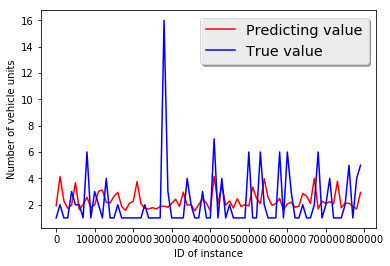

In [223]:
fig, ax = plt.subplots()
ax.plot(range(0,len(y_test),10000),units_hat[range(0,len(y_test),10000)],'r-', label='Predicting value')
ax.plot(range(0,len(y_test),10000),y_test[:,0][range(0,len(y_test),10000)],'b-', label='True value')
# plt.plot(range(0,len(y_test),10000),y_hat[:,0][range(0,len(y_test),10000)],'r-',range(0,len(y_test),10000),y_test[:,0][range(0,len(y_test),10000)],'b-')
legend = ax.legend(shadow=True, fontsize='x-large')
plt.xlabel("ID of instance")
plt.ylabel("Number of vehicle units")
# plt.plot(range(0,len(y_test),10000),units_hat[range(0,len(y_test),10000)],'r-',range(0,len(y_test),10000),y_test[:,0][range(0,len(y_test),10000)],'b-')

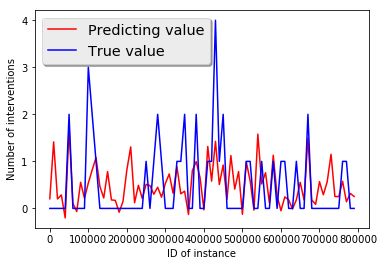

In [224]:
fig, ax = plt.subplots()
ax.plot(range(0,len(y_test),10000),int_hat[range(0,len(y_test),10000)],'r-', label='Predicting value')
ax.plot(range(0,len(y_test),10000),y_test[:,1][range(0,len(y_test),10000)],'b-', label='True value')

legend = ax.legend(shadow=True, fontsize='x-large')
plt.xlabel("ID of instance")
plt.ylabel("Number of interventions")

# plt.plot(range(0,len(y_test),10000),int_hat[range(0,len(y_test),10000)],'r-',range(0,len(y_test),10000),y_test[:,0][range(0,len(y_test),10000)],'b-')

In [221]:
X_values.shape

(2663940, 62)

In [222]:
a

0.03533605123108019

In [225]:
b

0.22887685074063102

## 2. Neural Network

In [131]:
import tensorflow as tf
from tensorflow.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras import Sequential
from tensorflow.python.keras import optimizers


In [137]:
model=Sequential()
model.add(Dense(units=100, activation='tanh', input_dim=62))
model.add(Dense(units=150, activation='tanh'))
model.add(Dense(units=50, activation='tanh'))
model.add(Dense(units=2, activation='linear'))

model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               6300      
_________________________________________________________________
dense_6 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                7550      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 102       
Total params: 29,102
Trainable params: 29,102
Non-trainable params: 0
_________________________________________________________________


In [138]:
y_test.shape

(799182, 2)

In [139]:
X_train.shape

(1864758, 62)

In [140]:
model.fit(X_train, y_train,epochs=100,batch_size=50)

Epoch 1/100
1864758/1864758 [==============================] - 157s 84us/step - loss: 3.5822 - mean_squared_error: 3.5822
Epoch 2/100
1864758/1864758 [==============================] - 178s 96us/step - loss: 3.5690 - mean_squared_error: 3.5690
Epoch 3/100
1864758/1864758 [==============================] - 128s 69us/step - loss: 3.5660 - mean_squared_error: 3.5660
Epoch 4/100
1864758/1864758 [==============================] - 93s 50us/step - loss: 3.5638 - mean_squared_error: 3.5638
Epoch 5/100
1864758/1864758 [==============================] - 87s 47us/step - loss: 3.5621 - mean_squared_error: 3.5621
Epoch 6/100
1864758/1864758 [==============================] - 95s 51us/step - loss: 3.5606 - mean_squared_error: 3.5606
Epoch 7/100
1864758/1864758 [==============================] - 93s 50us/step - loss: 3.5594 - mean_squared_error: 3.5594
Epoch 8/100
1864758/1864758 [==============================] - 94s 50us/step - loss: 3.5582 - mean_squared_error: 3.5582
Epoch 9/100
1864758/1864758 [

In [146]:
y_hat=model.predict(X_test)

In [142]:
y_hat.shape

(799182, 2)

In [143]:
MSE(y_hat[0],y_test[0])

0.40983181576010175

In [144]:
MSE(y_hat[1],y_test[1])

0.07357071037036178

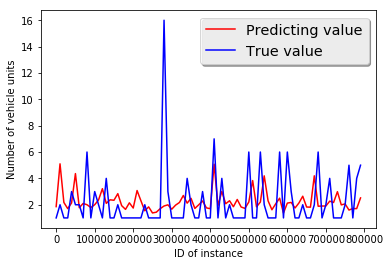

In [191]:
fig, ax = plt.subplots()
ax.plot(range(0,len(y_test),10000),y_hat[:,0][range(0,len(y_test),10000)],'r-', label='Predicting value')
ax.plot(range(0,len(y_test),10000),y_test[:,0][range(0,len(y_test),10000)],'b-', label='True value')
# plt.plot(range(0,len(y_test),10000),y_hat[:,0][range(0,len(y_test),10000)],'r-',range(0,len(y_test),10000),y_test[:,0][range(0,len(y_test),10000)],'b-')
legend = ax.legend(shadow=True, fontsize='x-large')
plt.xlabel("ID of instance")
plt.ylabel("Number of vehicle units")


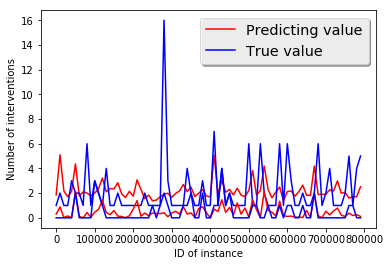

In [192]:
fig, ax = plt.subplots()
ax.plot(range(0,len(y_test),10000),y_hat[:,0][range(0,len(y_test),10000)],'r-', label='Predicting value')
ax.plot(range(0,len(y_test),10000),y_test[:,0][range(0,len(y_test),10000)],'b-', label='True value')
# plt.plot(range(0,len(y_test),10000),y_hat[:,0][range(0,len(y_test),10000)],'r-',range(0,len(y_test),10000),y_test[:,0][range(0,len(y_test),10000)],'b-')
legend = ax.legend(shadow=True, fontsize='x-large')
plt.xlabel("ID of instance")
plt.ylabel("Number of interventions")

# plt.plot(range(0,len(y_test),10000),y_hat[:,1][range(0,len(y_test),10000)],'r-',range(0,len(y_test),10000),y_test[:,1][range(0,len(y_test),10000)],'b-')